In [1]:
import nltk
nltk.download('punkt')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
text_eng  = " Don't hesitate to ask questions"
text_kor  = """삼성 갤럭시(GalaxyNote)노트의 신형을 홍보 합니다. 
홍보:유관순   031-478-2311  010-8888-9999.
삼성 페이지 https://www.samsung.com/sec/index.html"""

[nltk_data] Downloading package punkt to /Users/masterp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package tagsets to /Users/masterp/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/masterp/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
from nltk import sent_tokenize, word_tokenize, FreqDist
sent_tokenize(text_kor)

['삼성 갤럭시(GalaxyNote)노트의 신형을 홍보 합니다.',
 '홍보:유관순   031-478-2311  010-8888-9999.',
 '삼성 페이지 https://www.samsung.com/sec/index.html']

In [3]:
tokens = word_tokenize(text_kor)
tokens

['삼성',
 '갤럭시',
 '(',
 'GalaxyNote',
 ')',
 '노트의',
 '신형을',
 '홍보',
 '합니다',
 '.',
 '홍보',
 ':',
 '유관순',
 '031-478-2311',
 '010-8888-9999',
 '.',
 '삼성',
 '페이지',
 'https',
 ':',
 '//www.samsung.com/sec/index.html']

In [4]:
dict(FreqDist(tokens))

{'삼성': 2,
 '갤럭시': 1,
 '(': 1,
 'GalaxyNote': 1,
 ')': 1,
 '노트의': 1,
 '신형을': 1,
 '홍보': 2,
 '합니다': 1,
 '.': 2,
 ':': 2,
 '유관순': 1,
 '031-478-2311': 1,
 '010-8888-9999': 1,
 '페이지': 1,
 'https': 1,
 '//www.samsung.com/sec/index.html': 1}

In [5]:
import re
tokenizer = re.compile(r'[ㄱ-힣]+')    #한글만 chunk단위(띄어쓰기)로 추출
tokenizer.findall(text_kor)

['삼성', '갤럭시', '노트의', '신형을', '홍보', '합니다', '홍보', '유관순', '삼성', '페이지']

In [6]:
tokenizer = re.compile(r'[0-9]{3}-[0-9]{3,4}-[0-9]{4}')    #휴대폰 전화번호 추출_v1
tokenizer.findall(text_kor)

['031-478-2311', '010-8888-9999']

In [7]:
tokenizer = re.compile(r'\d{3}-\d{3,4}-\d{4}')    #휴대폰 전화번호 추출_v2
tokenizer.findall(text_kor)

['031-478-2311', '010-8888-9999']

In [8]:
tokenizer = re.compile(r'[^ 가-힣]+')    #한글이 아닌 문자열 추출
tokenizer.findall(text_kor)

['(GalaxyNote)',
 '.',
 '\n',
 ':',
 '031-478-2311',
 '010-8888-9999.\n',
 'https://www.samsung.com/sec/index.html']

In [9]:
tokenizer.sub("", text_kor)#.split(" ")

'삼성 갤럭시노트의 신형을 홍보 합니다 홍보유관순     삼성 페이지 '

In [10]:
tokenizer = re.compile(r'https://[w]{3}.[A-z]+.[./A-z]+')
tokenizer.findall(text_kor)

['https://www.samsung.com/sec/index.html']

In [11]:
text_eng = text_eng.lower()
text_eng

" don't hesitate to ask questions"

In [12]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
token = tokenizer.tokenize(text_eng)
token

['do', "n't", 'hesitate', 'to', 'ask', 'questions']

In [13]:
from nltk import pos_tag
pos_tag(token)

[('do', 'VBP'),
 ("n't", 'RB'),
 ('hesitate', 'VB'),
 ('to', 'TO'),
 ('ask', 'VB'),
 ('questions', 'NNS')]

In [14]:
import nltk.help as nltk_help
nltk_help.upenn_tagset('PRP')    #대명사

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [15]:
nltk_help.upenn_tagset('JJ')    #형용사

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [16]:
from konlpy.tag import Okt, Kkma, Hannanum
twitter = Okt()
text = "파이썬을 활용하여 자연어 분석 특강입니다"
print(twitter.pos(text, stem=True))

/anaconda3/envs/keras/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[('파이썬', 'Noun'), ('을', 'Josa'), ('활용', 'Noun'), ('하다', 'Verb'), ('자연어', 'Noun'), ('분석', 'Noun'), ('특강', 'Noun'), ('이다', 'Adjective')]


In [17]:
print(twitter.pos(text))

[('파이썬', 'Noun'), ('을', 'Josa'), ('활용', 'Noun'), ('하여', 'Verb'), ('자연어', 'Noun'), ('분석', 'Noun'), ('특강', 'Noun'), ('입니다', 'Adjective')]


In [18]:
%%time
kkma = Kkma()
print(kkma.pos(text))

[('파이', 'NNG'), ('썰', 'VV'), ('ㄴ', 'ETD'), ('을', 'NNG'), ('활용', 'NNG'), ('하', 'XSV'), ('여', 'ECS'), ('자연어', 'NNG'), ('분석', 'NNG'), ('특강', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]
CPU times: user 13.3 s, sys: 284 ms, total: 13.6 s
Wall time: 3.3 s


In [19]:
%%time
han = Hannanum()
print(han.pos(text))

[('파이썬', 'N'), ('을', 'J'), ('활용', 'N'), ('하', 'X'), ('어', 'E'), ('자연어', 'N'), ('분석', 'N'), ('특강', 'N'), ('이', 'J'), ('ㅂ니다', 'E')]
CPU times: user 1.02 s, sys: 22.9 ms, total: 1.04 s
Wall time: 271 ms


In [20]:
speech_text = "pyongyang_fin.txt"
font_file   = "D2Coding.ttf"
# speech_text = "../data/pyongyang_fin.txt"
# font_file   = "../data/D2Coding.ttf"

In [21]:
import nltk
nltk.download('punkt')

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# for Colab
# import requests
# texts = requests.get(speech_text).text
# texts[:100]

# for LocalHost
with open(speech_text, 'r') as f:
    texts = f.read()
texts[:100]

[nltk_data] Downloading package punkt to /Users/masterp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'존경하는 국민여러분. 성원해 주신 덕분에 평양에 잘 다녀왔습니다. \n\n국민 여러분께서 보셨듯이 정상회담에서 좋은 합의를 이뤘고, 최상의 환대를 받았습니다. 무엇보다 3일동안 김정은'

(-0.5, 399.5, 199.5, -0.5)

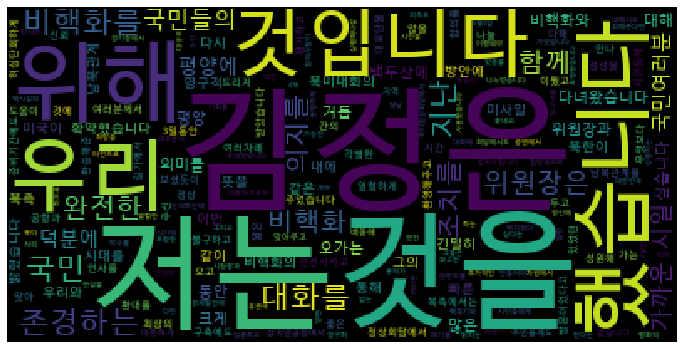

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wcloud = WordCloud(font_file).generate(texts)
plt.figure(figsize=(12,12))
plt.imshow(wcloud)
plt.axis("off")

In [23]:
from collections import Counter
dictionary = Counter(texts.split())
dictionary.most_common(5)

[('김정은', 7), ('저는', 6), ('것을', 6), ('수', 5), ('위해', 5)]

In [24]:
# Twitter  모듈을 활용하여 명사만 추출

from konlpy.tag import Okt
twitter = Okt()
tokens = twitter.pos(texts)    # 명사만 추출하는 상황으로 steming 'stem=True' 은 필요없다
tokens_noun = [token[0] for token in tokens if token[1] == "Noun"]

texts_noun = " ".join(tokens_noun)
texts_noun[:300]

'존경 국민 여러분 성원 주신 덕분 평양 국민 여러분 정상회담 합의 최상 환대 무엇 김정은 위원장 차례 시간 대화 허심 탄회 수 것 의미 남북관계 크게 진전 두 정상 간의 신뢰 구축 도움 방문 평가 북 준비 기간 불구 우리 대표 단 정성 다해 동안 공항 길가 환영 환송 평양 시민 각별 인사 수 백두산 동안 삼지연공항 배웅 준 지역 주민 감사 저 경기장 대규모 집단체조 공연 평양 시민 대한민국 대통령 사상 최초 연설 기회 그 한반도 영구 핵무기 핵 위협 평화 터전 저 연설 대해 박수 보 존경 국민 여러분 지난 저 김정은 위원장 비핵화 '

(-0.5, 399.5, 199.5, -0.5)

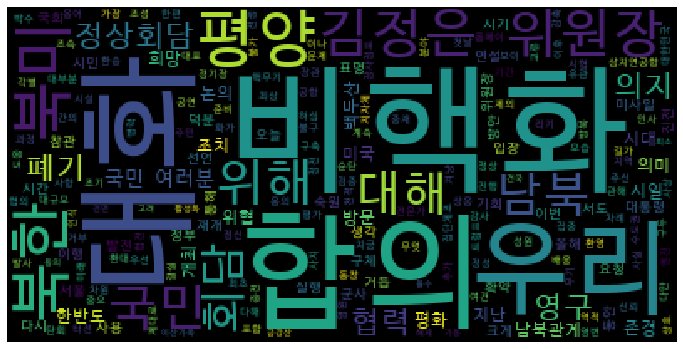

In [25]:
%matplotlib inline
plt.figure(figsize=(12,12))
wcloud = WordCloud(font_file).generate(texts_noun)
plt.imshow(wcloud)
plt.axis("off")

In [26]:
from collections import Counter
dictionary = Counter(texts_noun.split())
dictionary.most_common(5)

[('것', 14), ('국민', 10), ('비핵화', 10), ('위원장', 9), ('합의', 8)]